## 1.Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log (как вариант - использовать np.clip или np.where).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=2) 

In [2]:
%matplotlib inline
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

In [3]:
def calc_logloss(y, y_pred):
    y_pred = np.array(y_pred)
    y_pred = np.clip(y_pred, 0.0001, 0.9999) # ограничение допустимых значений
    err = np.mean(- y * np.log(y_pred) - (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [5]:
# Тест 1
y_true = 1
y_pred = 1
calc_logloss(y_true, y_pred)


0.00010000500033334732

In [6]:
# Тест 2
y_true = 1
y_pred = 0
calc_logloss(y_true, y_pred)

9.210340371976182

## 2.Подберите аргументы функции eval_LR_model для логистической регрессии таким образом, чтобы log loss был минимальным (оптимально здесь использовать критерий остановки обучения).

In [4]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]],  # квалификация репетитора
              dtype = np.float64).T 

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]) # поступил или нет ученик на специальность Математика
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [5]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [6]:
def standard_scaler(x):
    res = (x - x.mean()) / x.std()
    return res

X_st = X.copy()
X_st[:, 2] = standard_scaler(X[:, 2])
X_st[:, 2]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

In [7]:
def eval_LR_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        z = np.dot(X, w) # log(p/(1-p))
        y_pred = sigmoid(z) # p [0, 1]
        err = calc_logloss(y, y_pred)
        w -= alpha * (1/n * np.dot(X.T, (y_pred - y)))
        if i % (iterations / 10) == 0:
            pass #print(i, w, err)
    return err

In [ ]:
error_list=[]
for iteration_num in range(1000, 20000, 1000):
    err= eval_LR_model(X_st, y, iterations=iteration_num, alpha=100)
    if iteration_num%(iteration_num/100) == 0:
        print(iteration_num, err)
        error_list.append(err)

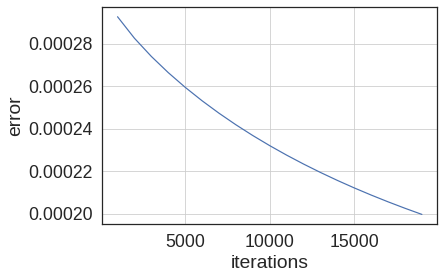

In [47]:
plt.plot(range(1000, 20000, 1000), error_list)
plt.xlabel('iterations')
plt.ylabel('error')
plt.grid();

Ответ: iterations = 20000, alpha = 1000

## 3.Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model, на выходе - массив y_pred_proba).

In [19]:
def eval_LR_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        z = np.dot(X, w) # log(p/(1-p))
        y_pred = sigmoid(z) # p [0, 1]
        err = calc_logloss(y, y_pred)
        w -= alpha * (1/n * np.dot(X.T, (y_pred - y)))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [39]:
w = eval_LR_model(X_st, y, iterations=20000, alpha=1e-2) 

1000 [-0.29764618 -0.72670545  1.061634    1.39666497] 0.5233765331724747
2000 [-0.64214517 -0.81531815  1.11599369  1.72618787] 0.4994117173889703
3000 [-0.95627497 -0.87648865  1.10170056  2.00552673] 0.48129979151302804
4000 [-1.25395556 -0.91702026  1.05407927  2.24381099] 0.4663484120925518
5000 [-1.53718107 -0.94412619  0.98701591  2.45304376] 0.4534151021622755
6000 [-1.80709894 -0.96248191  0.90882535  2.64121123] 0.4419377780140083
7000 [-2.0646379  -0.97512726  0.82480965  2.81363531] 0.4316064579082126
8000 [-2.31061284 -0.98407392  0.73840308  2.97395036] 0.42222864967057394
9000 [-2.54576745 -0.99066711  0.65182927  3.12469136] 0.4136706162543685
10000 [-2.77079473 -0.99580928  0.56650766  3.2676589 ] 0.4058305387773312


In [40]:
print(w)

[-2.77079473 -0.99580928  0.56650766  3.2676589 ]


In [15]:
def calc_pred_proba(w, X):
    
    m = X.shape[1]
    
    y_pred_proba = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    y_pred_proba = sigmoid(np.dot(w.T, X))
      
    return y_pred_proba

In [47]:
y_predicted = calc_pred_proba(w,X.T)

In [48]:
print(y_predicted)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


## 4.Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model, на выходе - массив y_pred).

In [130]:
def calc_pred(w, X, p):
    
    m = X.shape[1]
    
    y_pred_proba = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X))
    

    for i in range(A.shape[1]):
        if (A[:,i] > p): 
            y_pred_proba[:, i] = 1
        elif (A[:,i] <= p):
            y_pred_proba[:, i] = 0
    
    return y_pred

In [131]:
y_predicted = calc_pred(w,X.T, 0.6)

## 5. Посчитайте accuracy, матрицу ошибок, precision и recall, а также F1-score.

In [49]:
print(y)
print(y_predicted)

[0 0 1 0 1 0 1 0 1 1]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [50]:
TP = 5
TN = 0
FP = 5
FN = 0

In [52]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
print(accuracy)

0.5


In [53]:
precision = TP / (TP + FP)
print(accuracy)

0.5


In [54]:
recall = TP / (TP + FN)
print(recall)

1.0


In [55]:
F1 = 2 * precision * recall / (precision + recall)
print(F1)

0.6666666666666666


## 6.Могла ли модель переобучиться? Почему

Да, модель могла переобучиться, т.к не производилась регуляризация.